In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Caminho do arquivo
file_path = 'boletim.xls'

# Lendo o arquivo com o motor 'xlrd' explicitamente
df = pd.read_excel(file_path, engine='xlrd', header=1, sheet_name=1)

print(df.columns)



Index(['id_arrecadacao', 'id_uf', 'co_periodo', 'ANO2', 'MÊS',
       'va_icms_primario', 'va_icms_secundario', 'va_icms_terciario',
       'va_icms_terciario_atacadista', 'va_icms_terciario_varejista',
       'va_icms_terciario_transportes', 'va_icms_terciario_comunicacao',
       'va_icms_terciario_outros', 'va_icms_energia',
       'va_icms_energia_secundario', 'va_icms_energia_terciario',
       'va_icms_combustiveis', 'va_icms_combustiveis_secundario',
       'va_icms_combustiveis_terciario', 'va_icms_divida_ativa',
       'va_icms_outras', 'va_icms_total', 'va_outros_tributos_ipva',
       'va_outros_tributos_itcd', 'va_outros_tributos_taxas',
       'va_outros_tributos_outros', 'va_outros_tributos_total',
       'va_receita_tributaria_total', 'created_at', 'updated_at', 'deleted_at',
       'sn_pendente'],
      dtype='object')


In [4]:
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
pd.set_option('display.width', None)        # Ajusta a largura para evitar cortes
#df.loc[0:10]#parece muuito útil e fácil de visualizar, as n primeira linhas de todas as colunas do dataframe



In [5]:
df.sample(10) #amostra aleatória de 10 exemplares do dataset

,id_arrecadacao,id_uf,co_periodo,ANO2,MÊS,va_icms_primario,va_icms_secundario,va_icms_terciario,va_icms_terciario_atacadista,va_icms_terciario_varejista,va_icms_terciario_transportes,va_icms_terciario_comunicacao,va_icms_terciario_outros,va_icms_energia,va_icms_energia_secundario,va_icms_energia_terciario,va_icms_combustiveis,va_icms_combustiveis_secundario,va_icms_combustiveis_terciario,va_icms_divida_ativa,va_icms_outras,va_icms_total,va_outros_tributos_ipva,va_outros_tributos_itcd,va_outros_tributos_taxas,va_outros_tributos_outros,va_outros_tributos_total,va_receita_tributaria_total,created_at,updated_at,deleted_at,sn_pendente
3184,6829,GO,200610,2006,10,10127663.0,7.302267e+07,1.278142e+08,46805964.0,41359424.0,8245734.0,31063833.0,339205,53001498,52640997,360501,43897559.0,18681043,25216516.0,8020581,18765386.0,3.346495e+08,30505064.0,2565524.0,357826.0,0,3.342841e+07,3.680779e+08,NaN,NaN,NaN,False
583,4317,MG,199810,1998,10,3562000.0,1.733340e+08,1.410880e+08,34766000.0,47497000.0,14379000.0,42002000.0,2444000,58662000,0,0,79957000.0,65481000,14476000.0,6741862,16731000.0,4.800759e+08,4730963.0,1839954.0,10643378.0,256,1.721455e+07,4.972904e+08,NaN,NaN,NaN,False
7181,4561,MG,201902,2019,2,16434941.0,1.042886e+09,1.367318e+09,629352780.0,372408656.0,52793357.0,253746798.0,59016447,590868979,74611888,516257091,860548215.0,725035783,135512432.0,22002421,132577513.0,4.032636e+09,810700545.0,59540518.0,202566369.0,0,1.072807e+09,5.105444e+09,NaN,08/11/2019 17:33:43,NaN,False
387,2431,CE,199803,1998,3,376115.0,2.928365e+07,4.298077e+07,18337274.0,12219534.0,1791632.0,10632332.0,0,14266100,0,0,11528898.0,0,0.0,739836,1962435.0,1.011378e+08,11772458.0,197184.0,358421.0,0,1.232806e+07,1.134659e+08,NaN,NaN,NaN,False
3256,4416,MG,200701,2007,1,32515016.0,4.492535e+08,5.362884e+08,151832585.0,165605901.0,25955991.0,166021223.0,26872679,202281379,0,202281379,316211111.0,288697362,27513749.0,7967925,37933572.0,1.582451e+09,738682990.0,6010094.0,114278064.0,0,8.589711e+08,2.441422e+09,NaN,NaN,NaN,False
8318,8655,SE,202209,2022,9,28822323.0,6.655126e+07,1.715361e+08,69048078.0,47967747.0,5880234.0,8395599.0,40244424,24551726,21373529,3178197,44941970.0,43662991,1278979.0,4001742,2912859.0,3.433180e+08,29898329.0,6334903.0,1123587.0,4624268,4.198109e+07,3.852990e+08,2022-10-04 09:35:41,06/10/2022 17:23:24,NaN,False
3900,3366,PE,200901,2009,1,514000.0,8.809500e+07,3.263300e+08,109163000.0,120199000.0,7957000.0,74825000.0,14186000,59386000,642000,58744000,106574000.0,81000,106493000.0,1112000,2940000.0,5.849510e+08,17812000.0,681000.0,813000.0,13219000,3.252500e+07,6.174760e+08,NaN,NaN,NaN,False
628,1903,MA,199812,1998,12,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,3.690916e+07,501064.0,20957.0,747157.0,487935,1.757113e+06,3.866627e+07,NaN,NaN,NaN,False
5949,2637,CE,201505,2015,5,740120.0,1.394553e+08,3.260324e+08,150580837.0,104402684.0,9653057.0,61177006.0,218854,98516696,98516696,0,184529321.0,170500044,14029277.0,4047530,14523302.0,7.678447e+08,75262614.0,9635229.0,1925484.0,13680,8.683701e+07,8.546817e+08,NaN,NaN,NaN,False
6294,1040,RR,201606,2016,6,20833.0,1.914178e+07,2.897252e+07,11713406.0,12026278.0,248026.0,4984302.0,513,3346008,3346008,0,26873.0,0,26873.0,365172,4020378.0,5.589357e+07,4241260.0,152759.0,109743.0,6140732,1.064449e+07,6.653806e+07,NaN,NaN,NaN,False


In [6]:
df['id_uf'] == 'SP'

0       False
1       False
2       False
3       False
4       False
        ...  
8986    False
8987    False
8988    False
8989    False
8990    False
Name: id_uf, Length: 8991, dtype: bool

In [7]:
df_sp = df[df['id_uf'] == 'SP']


In [8]:
# Filtrar os dados de São Paulo para 2024
df_sp_2024 = df_sp[df_sp['ANO2'] == 2024]

# Obter os meses presentes em 2024
meses_presentes_2024 = df_sp_2024['MÊS'].unique()

# Filtrar os dados para os meses presentes
df_mes_presentes = df_sp_2024[df_sp_2024['MÊS'].isin(meses_presentes_2024)]

# Agrupar por mês e somar os valores de va_outros_tributos_ipva
df_mes_presentes_agrupados = df_mes_presentes.groupby('MÊS')['va_outros_tributos_ipva'].sum().reset_index()

# Exibir os valores de va_outros_tributos_ipva para os meses presentes
print(df_mes_presentes_agrupados)


   MÊS  va_outros_tributos_ipva
0    1             1.068343e+10
1    2             4.091432e+09
2    3             3.081973e+09
3    4             2.848323e+09
4    5             0.000000e+00
5    6             0.000000e+00
6    7             0.000000e+00
7    8             0.000000e+00
8    9             0.000000e+00


In [9]:
df_ano_ipva = df_sp.groupby('ANO2')['va_outros_tributos_ipva'].sum().reset_index()


In [10]:
# Agrupar por ano e mês, somando os valores de IPVA
df_sp_ano_mes = df_sp.groupby(['ANO2', 'MÊS'])['va_outros_tributos_ipva'].sum().reset_index()

# Identificar os anos que possuem meses ausentes
anos_com_meses_completos = df_sp_ano_mes.groupby('ANO2')['MÊS'].count().reset_index()

# Filtrar apenas os anos que possuem 12 meses
anos_completos = anos_com_meses_completos[anos_com_meses_completos['MÊS'] == 12]['ANO2']

# Agora, agrupar novamente pelos anos, mas excluindo os anos com meses ausentes
df_ano_ipva = df_sp[df_sp['ANO2'].isin(anos_completos)].groupby('ANO2')['va_outros_tributos_ipva'].sum().reset_index()

# Exibir o DataFrame com os anos completos
print(df_ano_ipva)


    ANO2  va_outros_tributos_ipva
0   1997             1.931003e+09
1   1998             2.203331e+09
2   1999             2.121124e+09
3   2000             2.414263e+09
4   2001             2.882199e+09
5   2002             3.266001e+09
6   2003             3.475322e+09
7   2004             3.951301e+09
8   2005             4.657957e+09
9   2006             5.563270e+09
10  2007             6.699370e+09
11  2008             7.712396e+09
12  2009             8.862165e+09
13  2010             9.403915e+09
14  2011             1.053053e+10
15  2012             1.129994e+10
16  2013             1.241582e+10
17  2014             1.352434e+10
18  2015             1.452368e+10
19  2016             1.492215e+10
20  2017             1.528291e+10
21  2018             1.587877e+10
22  2019             1.688764e+10
23  2020             1.771154e+10
24  2021             1.853090e+10
25  2022             2.306558e+10
26  2023             2.831705e+10


In [11]:
df_ano_ipva

,ANO2,va_outros_tributos_ipva
0,1997,1.931003e+09
1,1998,2.203331e+09
2,1999,2.121124e+09
3,2000,2.414263e+09
4,2001,2.882199e+09
5,2002,3.266001e+09
6,2003,3.475322e+09
7,2004,3.951301e+09
8,2005,4.657957e+09
9,2006,5.563270e+09


In [12]:
df_ano_ipva['variação_anual_ipva'] = df_ano_ipva['va_outros_tributos_ipva']#.pct_change() * 100


In [13]:
df_ano_ipva_clean = df_ano_ipva.dropna(subset=['variação_anual_ipva'])
#df_ano_ipva_clean = df_ano_ipva.dropna(subset=['MÊS'])


In [14]:
df_ano_ipva_clean['variação_anual_ipva']

0     1.931003e+09
1     2.203331e+09
2     2.121124e+09
3     2.414263e+09
4     2.882199e+09
5     3.266001e+09
6     3.475322e+09
7     3.951301e+09
8     4.657957e+09
9     5.563270e+09
10    6.699370e+09
11    7.712396e+09
12    8.862165e+09
13    9.403915e+09
14    1.053053e+10
15    1.129994e+10
16    1.241582e+10
17    1.352434e+10
18    1.452368e+10
19    1.492215e+10
20    1.528291e+10
21    1.587877e+10
22    1.688764e+10
23    1.771154e+10
24    1.853090e+10
25    2.306558e+10
26    2.831705e+10
Name: variação_anual_ipva, dtype: float64

Projeção do IPVA para 2024: R$22,344,076,400.71
Projeção do IPVA para 2025: R$23,204,540,936.62
Projeção do IPVA para 2026: R$24,065,005,472.53


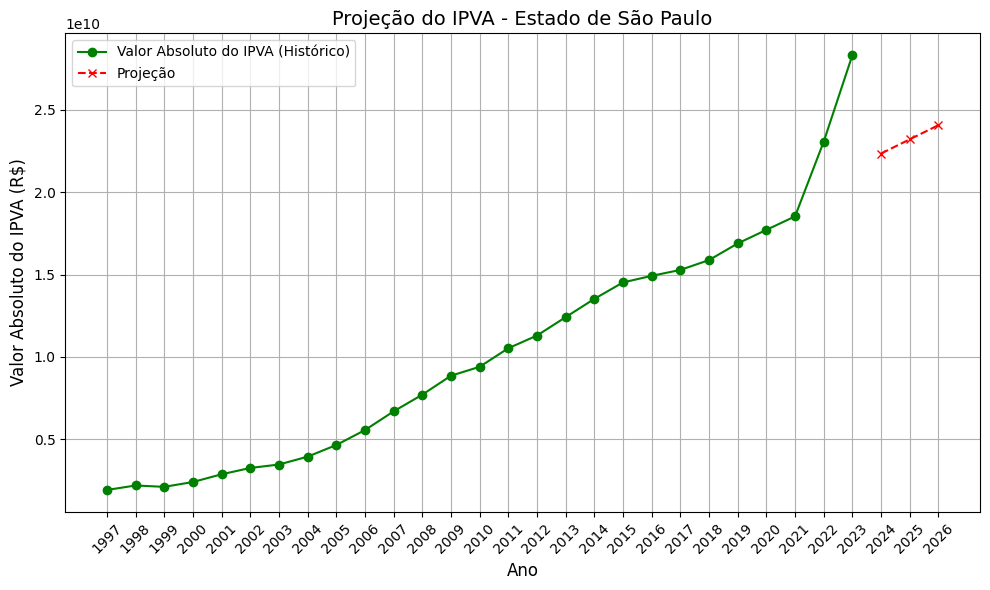

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filtrar dados do estado de São Paulo e agrupar por ano
#df_sp = df[df['id_uf'] == 'SP']
#df_ano_ipva = df_sp.groupby('ANO2')['va_outros_tributos_ipva'].sum().reset_index()

# Excluir o ano de 2024 para não influenciar o modelo de regressão
#df_ano_ipva = df_ano_ipva[df_ano_ipva['ANO2'] != 2024]




# Definir variáveis para a regressão linear
X = df_ano_ipva_clean['ANO2'].values.reshape(-1, 1)  # Anos
y = df_ano_ipva_clean['va_outros_tributos_ipva'].values  # Valores do IPVA

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Ajustar o modelo
modelo.fit(X, y)

# Fazer a previsão para 2024, 2025 e 2026
anos_futuros = np.array([2024, 2025, 2026]).reshape(-1, 1)
previsao_futura = modelo.predict(anos_futuros)

# Exibir as previsões
for ano, valor in zip([2024, 2025, 2026], previsao_futura):
    print(f'Projeção do IPVA para {ano}: R${valor:,.2f}')

# Plotar o gráfico com os dados históricos e as previsões
plt.figure(figsize=(10, 6))
plt.plot(df_ano_ipva_clean['ANO2'], df_ano_ipva_clean['va_outros_tributos_ipva'], marker='o', color='g', linestyle='-', label='Valor Absoluto do IPVA (Histórico)')

# Adicionar as previsões para 2024, 2025 e 2026
plt.plot([2024, 2025, 2026], previsao_futura, marker='x', color='r', linestyle='--', label='Projeção')

# Adicionar título e rótulos
plt.title('Projeção do IPVA - Estado de São Paulo', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor Absoluto do IPVA (R$)', fontsize=12)

# Exibir o gráfico
plt.grid(True)
plt.xticks(np.append(df_ano_ipva_clean['ANO2'], [2024, 2025, 2026]), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
import plotly.graph_objects as go
import pandas as pd

# Suponha que você já tenha o DataFrame df_sp (certifique-se de carregá-lo corretamente)

# Agrupar por ano e mês, somando os valores de IPVA
df_sp_ano_mes = df_sp.groupby(['ANO2', 'MÊS'])['va_outros_tributos_ipva'].sum().reset_index()

# Identificar os anos que possuem meses ausentes
anos_com_meses_completos = df_sp_ano_mes.groupby('ANO2')['MÊS'].count().reset_index()

# Filtrar apenas os anos que possuem 12 meses
anos_completos = anos_com_meses_completos[anos_com_meses_completos['MÊS'] == 12]['ANO2']

# Agora, agrupar novamente pelos anos, mas excluindo os anos com meses ausentes
df_ano_ipva = df_sp[df_sp['ANO2'].isin(anos_completos)].groupby('ANO2')['va_outros_tributos_ipva'].sum().reset_index()

# Exibir o DataFrame com os anos completos
print(df_ano_ipva)

# Função para formatar números em "bi"
def format_billion(x):
    return f"{x / 1e9:.1f} bi"

# Aplicar a formatação na coluna de IPVA
df_ano_ipva['va_outros_tributos_ipva'] = df_ano_ipva['va_outros_tributos_ipva'].apply(format_billion)

# Criar a tabela com Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
                #values=df_ano_ipva.columns,
                values=['Ano da arrecadação','Total anual'],
                fill_color='paleturquoise',  # Cor de fundo para o cabeçalho
                align='center',  # Alinhamento do texto no cabeçalho
                font=dict(color='black', size=14, family="Arial")),  # Fonte do cabeçalho
    cells=dict(values=[df_ano_ipva[col] for col in df_ano_ipva.columns],
               fill_color='lavender',  # Cor de fundo para as células
               align='center',  # Alinhamento do texto nas células
               font=dict(color='black', size=14, family="Arial"))  # Fonte das células
)])

# Ajustar layout da figura para garantir que a tabela caiba completamente
fig.update_layout(
    title="Tabela de Valores de IPVA por Ano (Anos Completos)",
    title_x=0.5,  # Centralizar o título
    title_font=dict(size=20, family="Arial", color="black"),  # Título com fonte maior
    height=800,  # Altura ajustada para comportar mais dados
    width=1000  # Largura ajustada para acomodar as colunas
)

# Exibir a tabela
fig.show()


    ANO2  va_outros_tributos_ipva
0   1997             1.931003e+09
1   1998             2.203331e+09
2   1999             2.121124e+09
3   2000             2.414263e+09
4   2001             2.882199e+09
5   2002             3.266001e+09
6   2003             3.475322e+09
7   2004             3.951301e+09
8   2005             4.657957e+09
9   2006             5.563270e+09
10  2007             6.699370e+09
11  2008             7.712396e+09
12  2009             8.862165e+09
13  2010             9.403915e+09
14  2011             1.053053e+10
15  2012             1.129994e+10
16  2013             1.241582e+10
17  2014             1.352434e+10
18  2015             1.452368e+10
19  2016             1.492215e+10
20  2017             1.528291e+10
21  2018             1.587877e+10
22  2019             1.688764e+10
23  2020             1.771154e+10
24  2021             1.853090e+10
25  2022             2.306558e+10
26  2023             2.831705e+10
